<a href="https://colab.research.google.com/github/ak-malone/NLU/blob/main/pics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pics = pd.read_parquet("hf://datasets/sentence-transformers/flickr30k-captions/pair/train-00000-of-00001.parquet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
# Select 150 random rows
pics = pics.sample(n=150, random_state=42, ignore_index=True)
pics

,caption1,caption2
0,A surfer is caching a wave.,A surfer riding the wave.
1,A princess is riding a ride at Disneyland.,"At Disney World, Princess Aurora is riding the..."
2,A dog with its mouth open is about to catch a ...,A dog reaches to catch a ball with its mouth.
3,Two men sit on a trucks tailgate as it is bein...,Two males are sitting in back of a pick up truck.
4,A group of children sitting on folding chairs ...,The kids talking while sitting on a row of cha...
...,...,...
145,Performers doing as they should atop a soccer ...,A group of people are in a special formation o...
146,A black man with a pale blue cap and yellow sh...,A older man wearing a hat while shining shoes.
147,A person wearing orange pants in playing in th...,Two girls climbing out of a mud pit by a beach.
148,A person wearing a white shirt pushes shopping...,A Chinese man wearing a white shirt shopping f...


In [4]:
pics["caption1_words"] = pics.caption1.str.split()
pics["caption2_words"] = pics.caption2.str.split()

In [5]:
pics

,caption1,caption2,caption1_words,caption2_words
0,A surfer is caching a wave.,A surfer riding the wave.,"[A, surfer, is, caching, a, wave.]","[A, surfer, riding, the, wave.]"
1,A princess is riding a ride at Disneyland.,"At Disney World, Princess Aurora is riding the...","[A, princess, is, riding, a, ride, at, Disneyl...","[At, Disney, World,, Princess, Aurora, is, rid..."
2,A dog with its mouth open is about to catch a ...,A dog reaches to catch a ball with its mouth.,"[A, dog, with, its, mouth, open, is, about, to...","[A, dog, reaches, to, catch, a, ball, with, it..."
3,Two men sit on a trucks tailgate as it is bein...,Two males are sitting in back of a pick up truck.,"[Two, men, sit, on, a, trucks, tailgate, as, i...","[Two, males, are, sitting, in, back, of, a, pi..."
4,A group of children sitting on folding chairs ...,The kids talking while sitting on a row of cha...,"[A, group, of, children, sitting, on, folding,...","[The, kids, talking, while, sitting, on, a, ro..."
...,...,...,...,...
145,Performers doing as they should atop a soccer ...,A group of people are in a special formation o...,"[Performers, doing, as, they, should, atop, a,...","[A, group, of, people, are, in, a, special, fo..."
146,A black man with a pale blue cap and yellow sh...,A older man wearing a hat while shining shoes.,"[A, black, man, with, a, pale, blue, cap, and,...","[A, older, man, wearing, a, hat, while, shinin..."
147,A person wearing orange pants in playing in th...,Two girls climbing out of a mud pit by a beach.,"[A, person, wearing, orange, pants, in, playin...","[Two, girls, climbing, out, of, a, mud, pit, b..."
148,A person wearing a white shirt pushes shopping...,A Chinese man wearing a white shirt shopping f...,"[A, person, wearing, a, white, shirt, pushes, ...","[A, Chinese, man, wearing, a, white, shirt, sh..."


In [6]:
def Jaccard(text1, text2):
  intersection = len(set(text1) & set(text2))
  union = len(set(text1) | set(text2))
  return(intersection/union)

In [7]:
pics["Jaccard_Similarity"] = pics.apply(lambda x: Jaccard(x.caption1_words, x.caption2_words), axis=1)
sim_cols = ["Jaccard_Similarity"]

In [8]:
pics

,caption1,caption2,caption1_words,caption2_words,Jaccard_Similarity
0,A surfer is caching a wave.,A surfer riding the wave.,"[A, surfer, is, caching, a, wave.]","[A, surfer, riding, the, wave.]",0.375000
1,A princess is riding a ride at Disneyland.,"At Disney World, Princess Aurora is riding the...","[A, princess, is, riding, a, ride, at, Disneyl...","[At, Disney, World,, Princess, Aurora, is, rid...",0.117647
2,A dog with its mouth open is about to catch a ...,A dog reaches to catch a ball with its mouth.,"[A, dog, with, its, mouth, open, is, about, to...","[A, dog, reaches, to, catch, a, ball, with, it...",0.470588
3,Two men sit on a trucks tailgate as it is bein...,Two males are sitting in back of a pick up truck.,"[Two, men, sit, on, a, trucks, tailgate, as, i...","[Two, males, are, sitting, in, back, of, a, pi...",0.095238
4,A group of children sitting on folding chairs ...,The kids talking while sitting on a row of cha...,"[A, group, of, children, sitting, on, folding,...","[The, kids, talking, while, sitting, on, a, ro...",0.210526
...,...,...,...,...,...
145,Performers doing as they should atop a soccer ...,A group of people are in a special formation o...,"[Performers, doing, as, they, should, atop, a,...","[A, group, of, people, are, in, a, special, fo...",0.166667
146,A black man with a pale blue cap and yellow sh...,A older man wearing a hat while shining shoes.,"[A, black, man, with, a, pale, blue, cap, and,...","[A, older, man, wearing, a, hat, while, shinin...",0.238095
147,A person wearing orange pants in playing in th...,Two girls climbing out of a mud pit by a beach.,"[A, person, wearing, orange, pants, in, playin...","[Two, girls, climbing, out, of, a, mud, pit, b...",0.000000
148,A person wearing a white shirt pushes shopping...,A Chinese man wearing a white shirt shopping f...,"[A, person, wearing, a, white, shirt, pushes, ...","[A, Chinese, man, wearing, a, white, shirt, sh...",0.285714


Stats bit

In [84]:
def logloss(df,col,sim):
  return -sim*sum(np.log(df[col]+0.001))/len(df)-(1-sim)*sum(np.log(1-df[col]+0.001)/len(df))

In [10]:
log_loss = [[sim_cols[-1], logloss(pics,sim_cols[-1],True)]]
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Jaccard_Similarity', 1.998449998927717]


<Axes: >

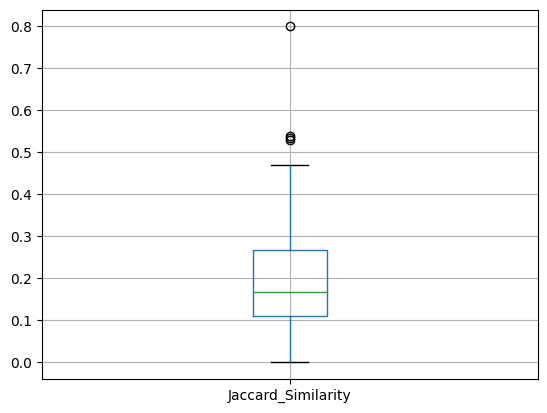

In [11]:
pics.boxplot(column=sim_cols)

In [12]:
pics_sorted = pics.sort_values(by="Jaccard_Similarity", ascending=False, ignore_index=True)
#pics_sorted

In [13]:
print("MOST SIMILAR")
print("")
print(pics_sorted.loc[0]['caption1'])
print(pics_sorted.loc[0]['caption2'])
print(pics_sorted.loc[0]['Jaccard_Similarity'])

MOST SIMILAR

A male in a black shirt is playing a guitar.
A man in a black shirt is playing guitar.
0.8


In [14]:
print("LEAST SIMILAR")
print("")
print(pics_sorted.loc[149]['caption1'])
print(pics_sorted.loc[149]['caption2'])
print(pics_sorted.loc[149]['Jaccard_Similarity'])

LEAST SIMILAR

two people laugh.
A man and a woman are smiling
0.0


#Preprocessing

In [15]:
def create_bow(documents):
  return list(set([word for movie_description in (documents) for word in movie_description]))

In [16]:
listofcaptions = pics.caption1_words.tolist()+pics.caption2_words.tolist()
bagofwords = create_bow(listofcaptions)
len(bagofwords)

1056

In [17]:
pics["caption1_lower"] = pics.caption1.str.lower()
pics["caption2_lower"] = pics.caption2.str.lower()

In [18]:
pics["caption1_lower_words"] = pics.caption1_lower.str.split()
pics["caption2_lower_words"] = pics.caption2_lower.str.split()

In [19]:

listoflowercaptions = pics.caption1_lower_words.tolist()+pics.caption2_lower_words.tolist()
bagoflowerwords = create_bow(listoflowercaptions)
len(bagoflowerwords)

1016

In [20]:
pics["caption1_processed"] = pics["caption1_lower"].str.replace(r'[^\w\s]+', '', regex=True)
pics["caption2_processed"] = pics["caption2_lower"].str.replace(r'[^\w\s]+', '', regex=True)
pics["caption1_processed_words"] = pics.caption1_processed.str.split()
pics["caption2_processed_words"] = pics.caption2_processed.str.split()

In [21]:
listofppcaptions = pics.caption1_processed_words.tolist()+pics.caption2_processed_words.tolist()
bagofppwords = create_bow(listofppcaptions)
len(bagofppwords)

878

In [22]:
pics

,caption1,caption2,caption1_words,caption2_words,Jaccard_Similarity,caption1_lower,caption2_lower,caption1_lower_words,caption2_lower_words,caption1_processed,caption2_processed,caption1_processed_words,caption2_processed_words
0,A surfer is caching a wave.,A surfer riding the wave.,"[A, surfer, is, caching, a, wave.]","[A, surfer, riding, the, wave.]",0.375000,a surfer is caching a wave.,a surfer riding the wave.,"[a, surfer, is, caching, a, wave.]","[a, surfer, riding, the, wave.]",a surfer is caching a wave,a surfer riding the wave,"[a, surfer, is, caching, a, wave]","[a, surfer, riding, the, wave]"
1,A princess is riding a ride at Disneyland.,"At Disney World, Princess Aurora is riding the...","[A, princess, is, riding, a, ride, at, Disneyl...","[At, Disney, World,, Princess, Aurora, is, rid...",0.117647,a princess is riding a ride at disneyland.,"at disney world, princess aurora is riding the...","[a, princess, is, riding, a, ride, at, disneyl...","[at, disney, world,, princess, aurora, is, rid...",a princess is riding a ride at disneyland,at disney world princess aurora is riding the ...,"[a, princess, is, riding, a, ride, at, disneyl...","[at, disney, world, princess, aurora, is, ridi..."
2,A dog with its mouth open is about to catch a ...,A dog reaches to catch a ball with its mouth.,"[A, dog, with, its, mouth, open, is, about, to...","[A, dog, reaches, to, catch, a, ball, with, it...",0.470588,a dog with its mouth open is about to catch a ...,a dog reaches to catch a ball with its mouth.,"[a, dog, with, its, mouth, open, is, about, to...","[a, dog, reaches, to, catch, a, ball, with, it...",a dog with its mouth open is about to catch a ...,a dog reaches to catch a ball with its mouth,"[a, dog, with, its, mouth, open, is, about, to...","[a, dog, reaches, to, catch, a, ball, with, it..."
3,Two men sit on a trucks tailgate as it is bein...,Two males are sitting in back of a pick up truck.,"[Two, men, sit, on, a, trucks, tailgate, as, i...","[Two, males, are, sitting, in, back, of, a, pi...",0.095238,two men sit on a trucks tailgate as it is bein...,two males are sitting in back of a pick up truck.,"[two, men, sit, on, a, trucks, tailgate, as, i...","[two, males, are, sitting, in, back, of, a, pi...",two men sit on a trucks tailgate as it is bein...,two males are sitting in back of a pick up truck,"[two, men, sit, on, a, trucks, tailgate, as, i...","[two, males, are, sitting, in, back, of, a, pi..."
4,A group of children sitting on folding chairs ...,The kids talking while sitting on a row of cha...,"[A, group, of, children, sitting, on, folding,...","[The, kids, talking, while, sitting, on, a, ro...",0.210526,a group of children sitting on folding chairs ...,the kids talking while sitting on a row of cha...,"[a, group, of, children, sitting, on, folding,...","[the, kids, talking, while, sitting, on, a, ro...",a group of children sitting on folding chairs ...,the kids talking while sitting on a row of cha...,"[a, group, of, children, sitting, on, folding,...","[the, kids, talking, while, sitting, on, a, ro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Performers doing as they should atop a soccer ...,A group of people are in a special formation o...,"[Performers, doing, as, they, should, atop, a,...","[A, group, of, people, are, in, a, special, fo...",0.166667,performers doing as they should atop a soccer ...,a group of people are in a special formation o...,"[performers, doing, as, they, should, atop, a,...","[a, group, of, people, are, in, a, special, fo...",performers doing as they should atop a soccer ...,a group of people are in a special formation o...,"[performers, doing, as, they, should, atop, a,...","[a, group, of, people, are, in, a, special, fo..."
146,A black man with a pale blue cap and yellow sh...,A older man wearing a hat while shining shoes.,"[A, black, man, with, a, pale, blue, cap, and,...","[A, older, man, wearing, a, hat, while, shinin...",0.238095,a black man with a pale blue cap an

Redo Jaccard

In [23]:
pics["Jaccard_Similarity_processed"] = pics.apply(lambda x: Jaccard(x.caption1_processed_words, x.caption2_processed_words), axis=1)
sim_cols.append("Jaccard_Similarity_processed")

In [24]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ")
print(log_loss)

Log Loss: 
[['Jaccard_Similarity', 1.998449998927717], ['Jaccard_Similarity_processed', 1.7285852958460806]]


<Axes: >

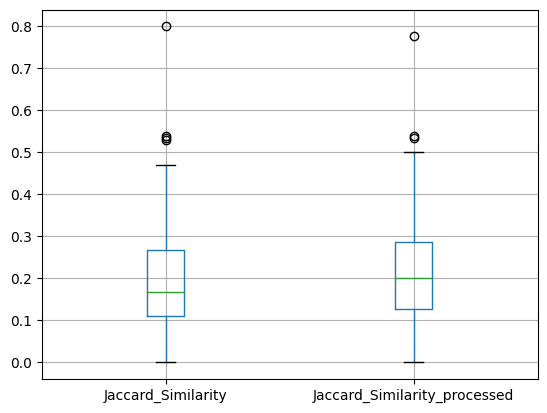

In [25]:
pics.boxplot(column=sim_cols)

#TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [27]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pics.caption1.tolist()+pics.caption2.tolist())
tfidf_matrix_caption1 = tfidf_matrix[0:150]
tfidf_matrix_caption2 = tfidf_matrix[150:]
pics["caption1_tfidf_sklearn"] = tfidf_matrix_caption1.toarray().tolist()
pics["caption2_tfidf_sklearn"] = tfidf_matrix_caption2.toarray().tolist()

In [28]:
pics

,caption1,caption2,caption1_words,caption2_words,Jaccard_Similarity,caption1_lower,caption2_lower,caption1_lower_words,caption2_lower_words,caption1_processed,caption2_processed,caption1_processed_words,caption2_processed_words,Jaccard_Similarity_processed,caption1_tfidf_sklearn,caption2_tfidf_sklearn
0,A surfer is caching a wave.,A surfer riding the wave.,"[A, surfer, is, caching, a, wave.]","[A, surfer, riding, the, wave.]",0.375000,a surfer is caching a wave.,a surfer riding the wave.,"[a, surfer, is, caching, a, wave.]","[a, surfer, riding, the, wave.]",a surfer is caching a wave,a surfer riding the wave,"[a, surfer, is, caching, a, wave]","[a, surfer, riding, the, wave]",0.428571,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,A princess is riding a ride at Disneyland.,"At Disney World, Princess Aurora is riding the...","[A, princess, is, riding, a, ride, at, Disneyl...","[At, Disney, World,, Princess, Aurora, is, rid...",0.117647,a princess is riding a ride at disneyland.,"at disney world, princess aurora is riding the...","[a, princess, is, riding, a, ride, at, disneyl...","[at, disney, world,, princess, aurora, is, rid...",a princess is riding a ride at disneyland,at disney world princess aurora is riding the ...,"[a, princess, is, riding, a, ride, at, disneyl...","[at, disney, world, princess, aurora, is, ridi...",0.384615,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,A dog with its mouth open is about to catch a ...,A dog reaches to catch a ball with its mouth.,"[A, dog, with, its, mouth, open, is, about, to...","[A, dog, reaches, to, catch, a, ball, with, it...",0.470588,a dog with its mouth open is about to catch a ...,a dog reaches to catch a ball with its mouth.,"[a, dog, with, its, mouth, open, is, about, to...","[a, dog, reaches, to, catch, a, ball, with, it...",a dog with its mouth open is about to catch a ...,a dog reaches to catch a ball with its mouth,"[a, dog, with, its, mouth, open, is, about, to...","[a, dog, reaches, to, catch, a, ball, with, it...",0.533333,"[0.0, 0.3216080218411005, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Two men sit on a trucks tailgate as it is bein...,Two males are sitting in back of a pick up truck.,"[Two, men, sit, on, a, trucks, tailgate, as, i...","[Two, males, are, sitting, in, back, of, a, pi...",0.095238,two men sit on a trucks tailgate as it is bein...,two males are sitting in back of a pick up truck.,"[two, men, sit, on, a, trucks, tailgate, as, i...","[two, males, are, sitting, in, back, of, a, pi...",two men sit on a trucks tailgate as it is bein...,two males are sitting in back of a pick up truck,"[two, men, sit, on, a, trucks, tailgate, as, i...","[two, males, are, sitting, in, back, of, a, pi...",0.095238,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,A group of children sitting on folding chairs ...,The kids talking while sitting on a row of cha...,"[A, group, of, children, sitting, on, folding,...","[The, kids, talking, while, sitting, on, a, ro...",0.210526,a group of children sitting on folding chairs ...,the kids talking while sitting on a row of cha...,"[a, group, of, children, sitting, on, folding,...","[the, kids, talking, while, sitting, on, a, ro...",a group of children sitting on folding chairs ...,the kids talking while sitting on a row of cha...,"[a, group, of, children, sitting, on, folding,...","[the, kids, talking, while, sitting, on, a, ro...",0.294118,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Performers doing as they should atop a soccer ...,A group of people are in a special formation o...,"[Performers, doing, as, they, should, atop, a,...","[A, group, of, people, are, in, a, special, fo...",0.166667,perfo

In [29]:
pics["TfIdf_Similarity_sklearn"] = pics.apply(lambda x: 1-cosine(x.caption1_tfidf_sklearn, x.caption2_tfidf_sklearn), axis=1)
sim_cols.append("TfIdf_Similarity_sklearn")

In [30]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['TfIdf_Similarity_sklearn', 2.0041585751363855]


<Axes: >

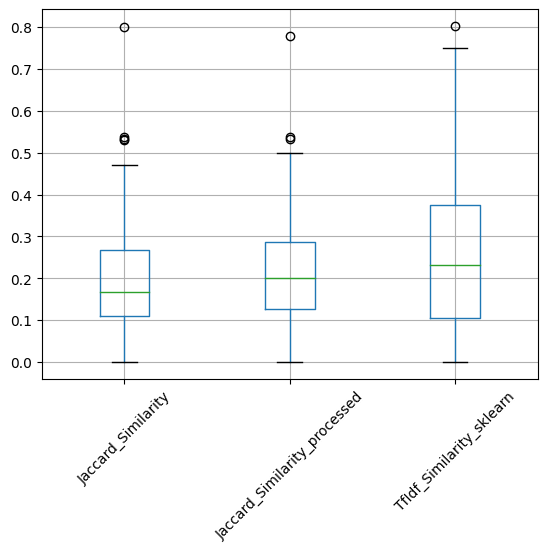

In [31]:
pics.boxplot(column=sim_cols, rot=45)

In [32]:
print(tfidf_matrix.shape)
print(tfidf_matrix.size)
print(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])
tfidf_matrix

(300, 869)
2956
260700


<300x869 sparse matrix of type '<class 'numpy.float64'>'
	with 2956 stored elements in Compressed Sparse Row format>

In [33]:
tfidf_matrix.size/(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])

0.011338703490602224

In [34]:
#pics.loc[17]

In [35]:
#print(pics["caption1"].loc[17])
#print(pics["caption2"].loc[17])

In [36]:
#pics[["title","TfIdf_Similarity", "TfIdf_Similarity_processed", "TfIdf_Similarity_sklearn"]]

In [37]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'features' is your sparse matrix
# and it's already preprocessed appropriately

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0, init="random")

# create the tsne arrangement of points in 2D (it is not really dimensionality reduction - it is arranging
# the points so that the most similar )
reduced_features = tsne.fit_transform(tfidf_matrix)

# Plot
#plt.figure(figsize=(10, 6))
#plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
#plt.title('t-SNE Visualization of Data Items')
#plt.xlabel('t-SNE Feature 1')
#plt.ylabel('t-SNE Feature 2')
#plt.show()

In [38]:
!pip install plotly

In [39]:
import plotly.express as px
import plotly.io as pio

# Reduced features from t-SNE and labels are assumed to be defined already

# Create a DataFrame for Plotly
plot_df = pd.DataFrame(reduced_features, columns=['Feature 1', 'Feature 2'])
plot_df['Text'] = [f'{pic}_caption1' for pic in pics.index.values]+[f'{pic}_caption2' for pic in pics.index.values]

# Create a scatter plot
fig = px.scatter(plot_df, x='Feature 1', y='Feature 2', hover_data=['Text'])

# Update layout
fig.update_layout(title='t-SNE Visualization with Text on Hover',
                  xaxis_title='t-SNE Feature 1',
                  yaxis_title='t-SNE Feature 2')

# Save to HTML
file_name = 'interactive_tsne_plot.html'
pio.write_html(fig, file=file_name)

print(f"Plot saved as {file_name}")

# This saves the plot as an html file, which is foolproof on any machine (which is why I did it this way)

# But (I believe) you can also display plotly interactive plots within Jupyter. Can you work out how to do this?

pio.show(fig)

Plot saved as interactive_tsne_plot.html


#Word embeddings

In [40]:
import spacy

In [41]:
#!python -m spacy download en_core_web_md

In [42]:
# Load the model with word embeddings
nlp = spacy.load('en_core_web_md')

In [43]:
pics["Spacy_Similarity"] = pics.apply(lambda x: nlp(x.caption1).similarity(nlp(x.caption2)), axis=1)
sim_cols.append("Spacy_Similarity")
#pics

In [44]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Spacy_Similarity', 0.2231060499009521]


<Axes: >

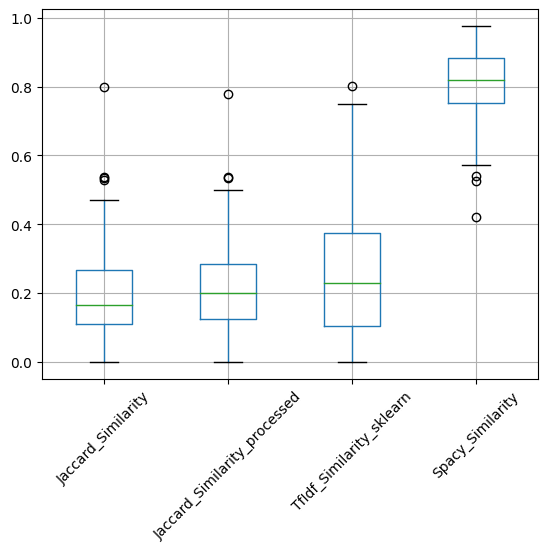

In [45]:
pics.boxplot(column=sim_cols, rot=45)

In [46]:
pics["Spacy_Similarity_processed"] = pics.apply(lambda x: nlp(x.caption1_processed).similarity(nlp(x.caption2_processed)), axis=1)
sim_cols.append("Spacy_Similarity_processed")

In [47]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Spacy_Similarity_processed', 0.21650048715669304]


<Axes: >

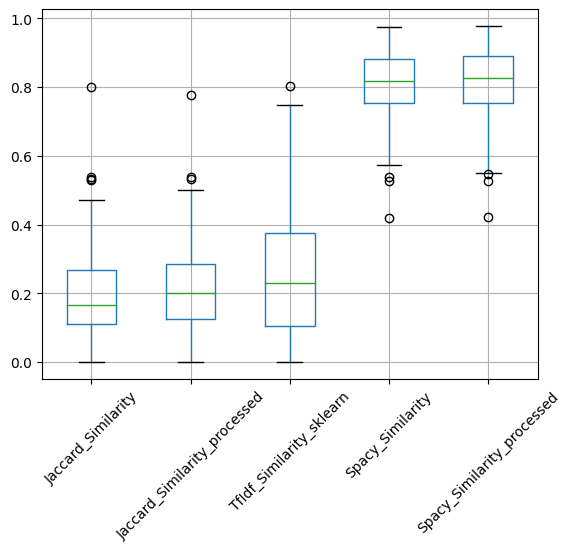

In [48]:
pics.boxplot(column=sim_cols, rot=45)

                 Scoring Method  Log Loss
0            Jaccard_Similarity  1.998450
1  Jaccard_Similarity_processed  1.728585
2      TfIdf_Similarity_sklearn  2.004159
3              Spacy_Similarity  0.223106
4    Spacy_Similarity_processed  0.216500


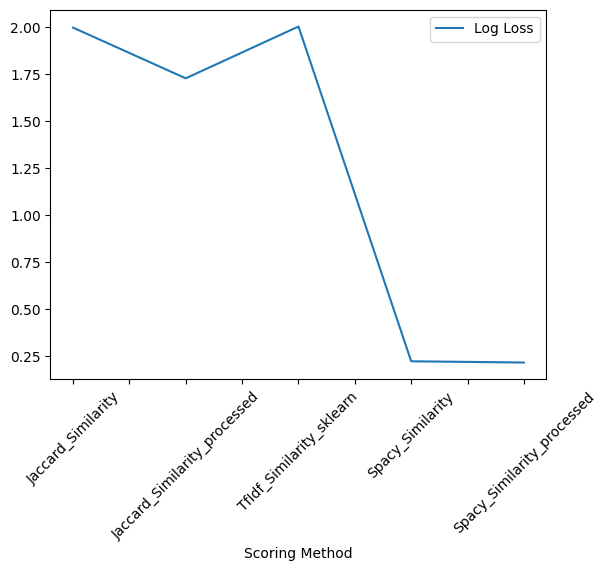

In [49]:
lldf = pd.DataFrame(log_loss,columns=["Scoring Method","Log Loss"])
lldf.plot.line(x="Scoring Method",rot=45)
print(lldf)

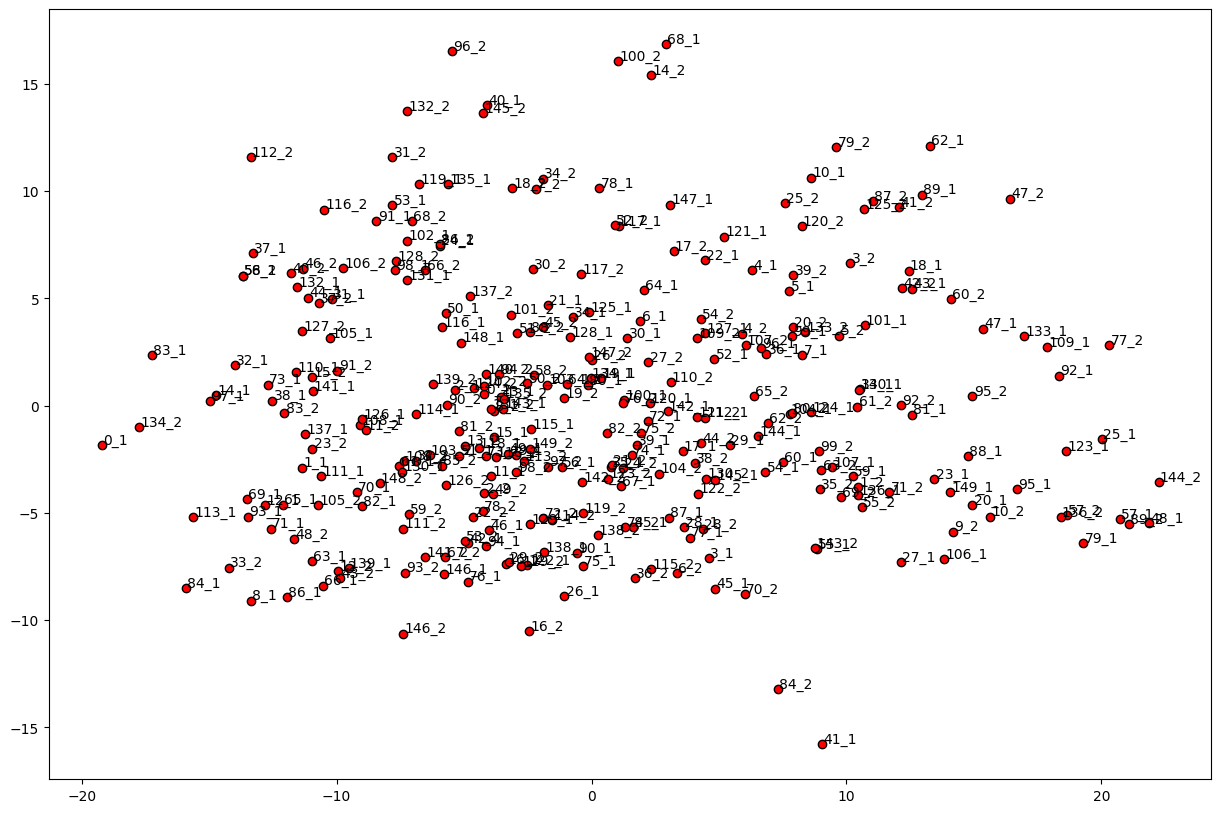

In [50]:
from sklearn.decomposition import PCA  # We will use PCA to visualise the embeddings.

des_list = pics.caption1.tolist()+pics.caption2.tolist()
des_vectors = np.array([nlp(movie_des).vector for movie_des in des_list])

twodim = PCA().fit_transform(des_vectors)[:,:2]

plt.figure(figsize=(15,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for movie, (x,y) in zip([f'{movie}_1' for movie in pics.index.values]+[f'{movie}_2' for movie in pics.index.values], twodim):
  plt.text(x+0.05, y+0.05, movie)

# Sentence Embeddings

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [51]:
!pip install sentence-transformers

In [52]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [53]:
pics["caption1_sbert"] = pics.apply(lambda x: sbert_model.encode([x.caption1])[0], axis=1)
pics["caption2_sbert"] = pics.apply(lambda x: sbert_model.encode([x.caption2])[0], axis=1)
pics["caption1_sbert_processed"] = pics.apply(lambda x: sbert_model.encode([x.caption1_processed])[0], axis=1)
pics["caption2_sbert_processed"] = pics.apply(lambda x: sbert_model.encode([x.caption2_processed])[0], axis=1)


In [54]:
pics["sbert_Similarity"] = pics.apply(lambda x: 1-cosine(x.caption1_sbert, x.caption2_sbert), axis=1)
sim_cols.append("sbert_Similarity")

In [55]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['sbert_Similarity', 0.3708299044213011]


In [56]:
pics["sbert_Similarity_processed"] = pics.apply(lambda x: 1-cosine(x.caption1_sbert_processed, x.caption2_sbert_processed), axis=1)
sim_cols.append("sbert_Similarity_processed")

In [57]:
log_loss.extend([[sim_cols[-1], logloss(pics,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['sbert_Similarity_processed', 0.3762061644228444]


<Axes: >

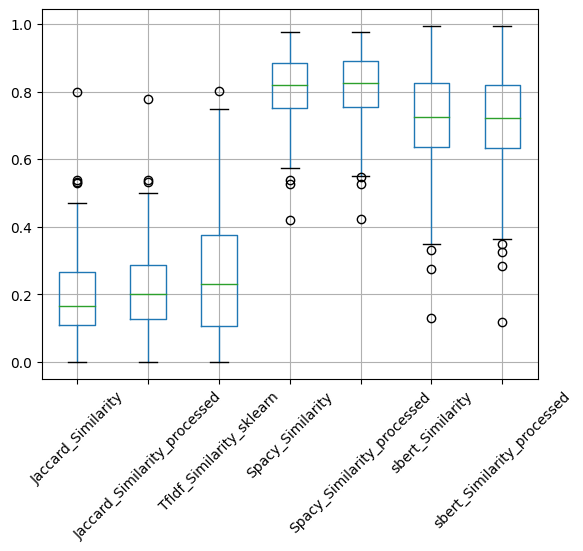

In [58]:
pics.boxplot(column=sim_cols, rot=45)

                 Scoring Method  Log Loss
0            Jaccard_Similarity  1.998450
1  Jaccard_Similarity_processed  1.728585
2      TfIdf_Similarity_sklearn  2.004159
3              Spacy_Similarity  0.223106
4    Spacy_Similarity_processed  0.216500
5              sbert_Similarity  0.370830
6    sbert_Similarity_processed  0.376206


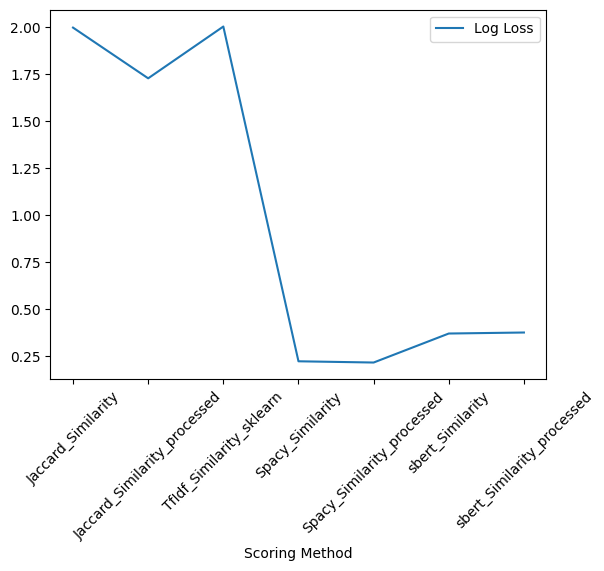

In [59]:
lldf = pd.DataFrame(log_loss,columns=["Scoring Method","Log Loss"])
lldf.plot.line(x="Scoring Method",rot=45)
print(lldf)

#Negative Comparison

In [60]:
#pics.columns

In [61]:
import random
random.seed(42)

In [62]:
movieIDs = pics.index.to_list()

cols = ["caption1", "caption1_words", "caption1_lower",
        "caption1_lower_words", "caption1_processed",
        "caption1_processed_words", "caption1_tfidf_sklearn",
        "caption1_sbert", "caption1_sbert_processed"
        ]
caption2s = [pd.DataFrame(cols),pd.DataFrame(cols)]
for i in range(2):
  random.shuffle(movieIDs)
  caption2s[i] = pics[cols].loc[movieIDs].reset_index(drop=True)
  caption2s[i].columns = [f'{col}_{i+1}' for col in caption2s[i].columns]

In [63]:
movie_pairs = pd.concat(caption2s, axis=1)
movie_pairs

,caption1_1,caption1_words_1,caption1_lower_1,caption1_lower_words_1,caption1_processed_1,caption1_processed_words_1,caption1_tfidf_sklearn_1,caption1_sbert_1,caption1_sbert_processed_1,caption1_2,caption1_words_2,caption1_lower_2,caption1_lower_words_2,caption1_processed_2,caption1_processed_words_2,caption1_tfidf_sklearn_2,caption1_sbert_2,caption1_sbert_processed_2
0,a girl sits on a swing ride.,"[a, girl, sits, on, a, swing, ride.]",a girl sits on a swing ride.,"[a, girl, sits, on, a, swing, ride.]",a girl sits on a swing ride,"[a, girl, sits, on, a, swing, ride]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.44389343, -1.0528265, -0.005334963, 0.2410...","[-0.36822087, -1.103867, 0.026619757, 0.255394...",A black dog wearing a blue shirt is jumping in...,"[A, black, dog, wearing, a, blue, shirt, is, j...",a black dog wearing a blue shirt is jumping in...,"[a, black, dog, wearing, a, blue, shirt, is, j...",a black dog wearing a blue shirt is jumping in...,"[a, black, dog, wearing, a, blue, shirt, is, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09734646, -0.06763837, -1.7002696, -0.2463...","[-0.09734646, -0.06763837, -1.7002696, -0.2463..."
1,Four men playing their instruments in the stre...,"[Four, men, playing, their, instruments, in, t...",four men playing their instruments in the stre...,"[four, men, playing, their, instruments, in, t...",four men playing their instruments in the stre...,"[four, men, playing, their, instruments, in, t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.044182003, -0.20902054, 0.19394341, -0.2367...","[0.035971873, -0.28969845, 0.17439955, -0.2217...","A man and a woman, both musicians, stand on st...","[A, man, and, a, woman,, both, musicians,, sta...","a man and a woman, both musicians, stand on st...","[a, man, and, a, woman,, both, musicians,, sta...",a man and a woman both musicians stand on stag...,"[a, man, and, a, woman, both, musicians, stand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.7411825, -0.13383585, 0.21682413, -0.61893...","[-0.7153842, -0.13997401, 0.25086495, -0.51791..."
2,Two people in racing clothes and helmets are r...,"[Two, people, in, racing, clothes, and, helmet...",two people in racing clothes and helmets are r...,"[two, people, in, racing, clothes, and, helmet...",two people in racing clothes and helmets are r...,"[two, people, in, racing, clothes, and, helmet...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6014187, -0.06833306, -0.13798305, 0.07080...","[-0.49123332, -0.08815488, -0.011913851, 0.072...",A young boy about the age of 2 sits on gray ro...,"[A, young, boy, about, the, age, of, 2, sits, ...",a young boy about the age of 2 sits on gray ro...,"[a, young, boy, about, the, age, of, 2, sits, ...",a young boy about the age of 2 sits on gray ro...,"[a, young, boy, about, the, age, of, 2, sits, ...","[0.0, 0.28632359036616073, 0.0, 0.0, 0.0, 0.0,...","[0.101422675, -0.26818547, -0.5508916, 0.33063...","[0.13673599, -0.2679471, -0.47598273, 0.376498..."
3,A man in a hat and blazer performs on the stre...,"[A, man, in, a, hat, and, blazer, performs, on...",a man in a hat and blazer performs on the stre...,"[a, man, in, a, hat, and, blazer, performs, on...",a man in a hat and blazer performs on the stre...,"[a, man, in, a, hat, and, blazer, performs, on...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4939826, -0.51864254, -0.13631243, -0.29540...","[0.5204762, -0.56399757, -0.08454894, -0.26357...",Man on snowmobile launching up into the air.,"[Man, on, snowmobile, launching, up, into, the...",man on snowmobile launching up into the air.,"[man, on, snowmobile, launching, up, into, the...",man on snowmobile launching up into the air,"[man, on, snowmobile, launching, up, into, the...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.511224, 0.83094364, -0.7035187, 0.14988376...","[-0.4814864, 0.76769567, -0.64278835, 0.141614..."
4,"A young man wearing a hoodie, pants, a

In [64]:
movie_pairs["same?"] = movie_pairs["caption1_1"] == movie_pairs["caption1_2"]
sum(movie_pairs["same?"])

1

In [65]:
movie_pairs.columns

Index(['caption1_1', 'caption1_words_1', 'caption1_lower_1',
       'caption1_lower_words_1', 'caption1_processed_1',
       'caption1_processed_words_1', 'caption1_tfidf_sklearn_1',
       'caption1_sbert_1', 'caption1_sbert_processed_1', 'caption1_2',
       'caption1_words_2', 'caption1_lower_2', 'caption1_lower_words_2',
       'caption1_processed_2', 'caption1_processed_words_2',
       'caption1_tfidf_sklearn_2', 'caption1_sbert_2',
       'caption1_sbert_processed_2', 'same?'],
      dtype='object')

In [98]:
def cos(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [105]:
movie_pairs["Jaccard_Similarity"] = movie_pairs.apply(lambda x: Jaccard(x.caption1_words_1, x.caption1_words_2), axis=1)
movie_pairs["Jaccard_Similarity_processed"] = movie_pairs.apply(lambda x: Jaccard(x.caption1_processed_words_1, x.caption1_processed_words_2), axis=1)
movie_pairs["TfIdf_Similarity_sklearn"] = movie_pairs.apply(lambda x: cos(x.caption1_tfidf_sklearn_1, x.caption1_tfidf_sklearn_2), axis=1)
movie_pairs["Spacy_Similarity"] = movie_pairs.apply(lambda x: nlp(x.caption1_1).similarity(nlp(x.caption1_2)), axis=1)
movie_pairs["Spacy_Similarity_processed"] = movie_pairs.apply(lambda x: nlp(x.caption1_processed_1).similarity(nlp(x.caption1_processed_2)), axis=1)
movie_pairs["sbert_Similarity"] = movie_pairs.apply(lambda x: abs(cos(x.caption1_sbert_1, x.caption1_sbert_2)), axis=1)
movie_pairs["sbert_Similarity_processed"] = movie_pairs.apply(lambda x: abs(cos(x.caption1_sbert_processed_1, x.caption1_sbert_processed_2)), axis=1)


In [106]:
movie_pairs.columns

Index(['caption1_1', 'caption1_words_1', 'caption1_lower_1',
       'caption1_lower_words_1', 'caption1_processed_1',
       'caption1_processed_words_1', 'caption1_tfidf_sklearn_1',
       'caption1_sbert_1', 'caption1_sbert_processed_1', 'caption1_2',
       'caption1_words_2', 'caption1_lower_2', 'caption1_lower_words_2',
       'caption1_processed_2', 'caption1_processed_words_2',
       'caption1_tfidf_sklearn_2', 'caption1_sbert_2',
       'caption1_sbert_processed_2', 'same?', 'Jaccard_Similarity',
       'Jaccard_Similarity_processed', 'TfIdf_Similarity_sklearn',
       'Spacy_Similarity', 'Spacy_Similarity_processed', 'sbert_Similarity',
       'sbert_Similarity_processed'],
      dtype='object')

In [107]:
movie_pairs[movie_pairs["sbert_Similarity"]<0][['caption1_1',
       'caption1_sbert_1', 'caption1_2', 'caption1_sbert_2',
       'sbert_Similarity', 'sbert_Similarity_processed']]

,caption1_1,caption1_sbert_1,caption1_2,caption1_sbert_2,sbert_Similarity,sbert_Similarity_processed


In [108]:
ll = []
for col in sim_cols:
  print(col)
  ll.append(logloss(movie_pairs,col,False))
  print(ll[-1])
  print("")

Jaccard_Similarity
0.13579583297050374

Jaccard_Similarity_processed
0.13146248783043907

TfIdf_Similarity_sklearn
0.08267332887346938

Spacy_Similarity
1.4252316252599677

Spacy_Similarity_processed
1.4673878313859787

sbert_Similarity
0.2933584821439581

sbert_Similarity_processed
0.29022749179080165



<Axes: >

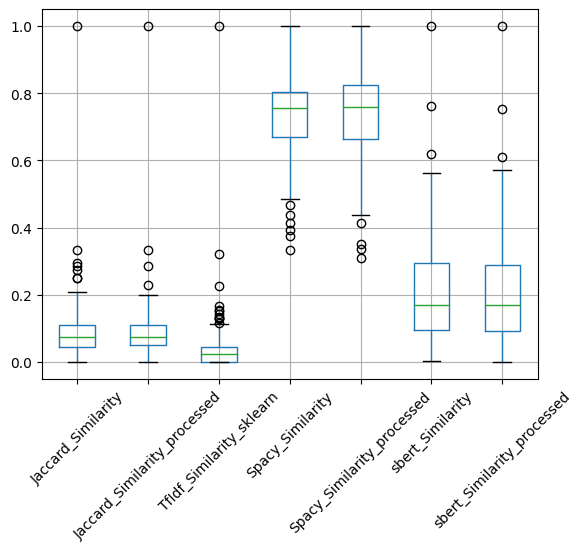

In [109]:
movie_pairs.boxplot(column=sim_cols, rot=45)

In [110]:
llS = pd.Series(ll)

In [111]:
LL = pd.concat([lldf,llS],axis=1)
LL.columns = ["Scoring Method","Log Loss","Log Loss Diff"]
LL["Overall Log Loss"] = (LL["Log Loss Diff"]+LL["Log Loss"])/2
LL

,Scoring Method,Log Loss,Log Loss Diff,Overall Log Loss
0,Jaccard_Similarity,1.998450,0.135796,1.067123
1,Jaccard_Similarity_processed,1.728585,0.131462,0.930024
2,TfIdf_Similarity_sklearn,2.004159,0.082673,1.043416
3,Spacy_Similarity,0.223106,1.425232,0.824169
4,Spacy_Similarity_processed,0.216500,1.467388,0.841944
5,sbert_Similarity,0.370830,0.293358,0.332094
6,sbert_Similarity_processed,0.376206,0.290227,0.333217


<Axes: xlabel='Scoring Method'>

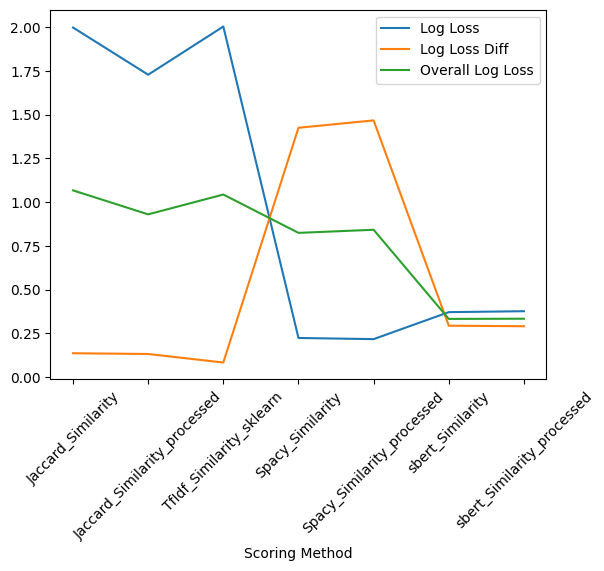

In [112]:
LL.plot.line(x="Scoring Method",rot=45)

next bit

In [94]:
caption2_lengths = [len(description) for description in pics["caption2_words"].values]
np.mean(caption2_lengths)

11.786666666666667

In [95]:
caption1_lengths = [len(description) for description in pics["caption1_words"].values]
np.mean(caption1_lengths)

12.046666666666667

In [96]:
caption2_char_lengths = [len(description) for description in pics["caption2"].values]
np.mean(caption2_char_lengths)

60.193333333333335

In [97]:
caption1_char_lengths = [len(description) for description in pics["caption1"].values]
np.mean(caption1_char_lengths)

62.026666666666664